# Plotbee Video Demo 

This is to show the capabilities of plotbee. The objective of this notebook is to show:
   * Loading Detections and Video

### Load Dependecies

In [1]:
import os
from plotbee.body import Body
from plotbee.frame import Frame
from plotbee.video import Video
from plotbee.track import Track
from plotbee.utils import read_json
import plotbee.videoplotter as vplt
from collections import defaultdict
import cv2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

/Users/jchan/Projects/plotbee/plotbee/utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Loading Detections

In [2]:
video = Video.load("../data/C02_170622120000_skeleton.json")

`print(video)` shows the video name, detection file and lenght of the video in frames. 

In [3]:
print(video)

Video(name=C02_170622120000.mp4, detections=merged_C02_170622120000_detections.json, len=6000)


In [4]:
len(video) # amount of frames 

6000

The video object is an iterable, that returns frames.

In [7]:
type(video), type(video[0])

(plotbee.video.Video, plotbee.frame.Frame)

Each frame has a list of detections (Body).

In [9]:
video[0]

Frame: 0
Body(id=-1, parts={1: [(992, 1124)], 2: [(1000, 884)], 3: [(996, 944)], 4: [(1052, 816)], 5: [(960, 836)])
Body(id=-1, parts={1: [(1744, 1056)], 2: [(1856, 1276)], 3: [(1816, 1216)], 4: [(1948, 1272)], 5: [(1948, 1252)])
Body(id=-1, parts={1: [(736, 540)], 2: [(644, 784)], 3: [(668, 728)], 4: [(584, 780)], 5: [(672, 828)])
Body(id=-1, parts={1: [(404, 280)], 2: [(644, 376)], 3: [(576, 336)], 4: [(664, 452)], 5: [(728, 364)])
Body(id=-1, parts={1: [(592, 992)], 2: [(516, 756)], 3: [(532, 816)], 4: [(568, 708)], 5: [(480, 700)])
Body(id=-1, parts={1: [(884, 732)], 2: [(724, 920)], 3: [(768, 868)], 4: [(644, 892)], 5: [(728, 944)])
Body(id=-1, parts={1: [(1884, 612)], 2: [(1720, 780)], 3: [(1768, 764)], 4: [(1652, 732)], 5: [(1684, 828)])
Body(id=-1, parts={1: [(880, 460)], 2: [(916, 696)], 3: [(916, 644)], 4: [(880, 724)], 5: [(932, 716)])
Body(id=-1, parts={1: [(2108, 1212)], 2: [(2144, 1020)], 3: [(2084, 1032)], 4: [(2192, 1100)], 5: [(2196, 1056)])
Body(id=-1, parts={1: [(213

In [12]:
frame0 = video[0]
body = frame0[0]

type(frame0), type(body)

(plotbee.frame.Frame, plotbee.body.Body)

#### video slicing
You can slice videos as list

In [ ]:
short_video = video[:10]
double_speed_video = video[::2]

len(short_video), len(double_speed_video)

## Plotting Video

The Video object hold the detection data, to plot images we need to specify the video location.

In [13]:
video.load_video("../data/C02_170622120000.mp4")

### Plot a Frame

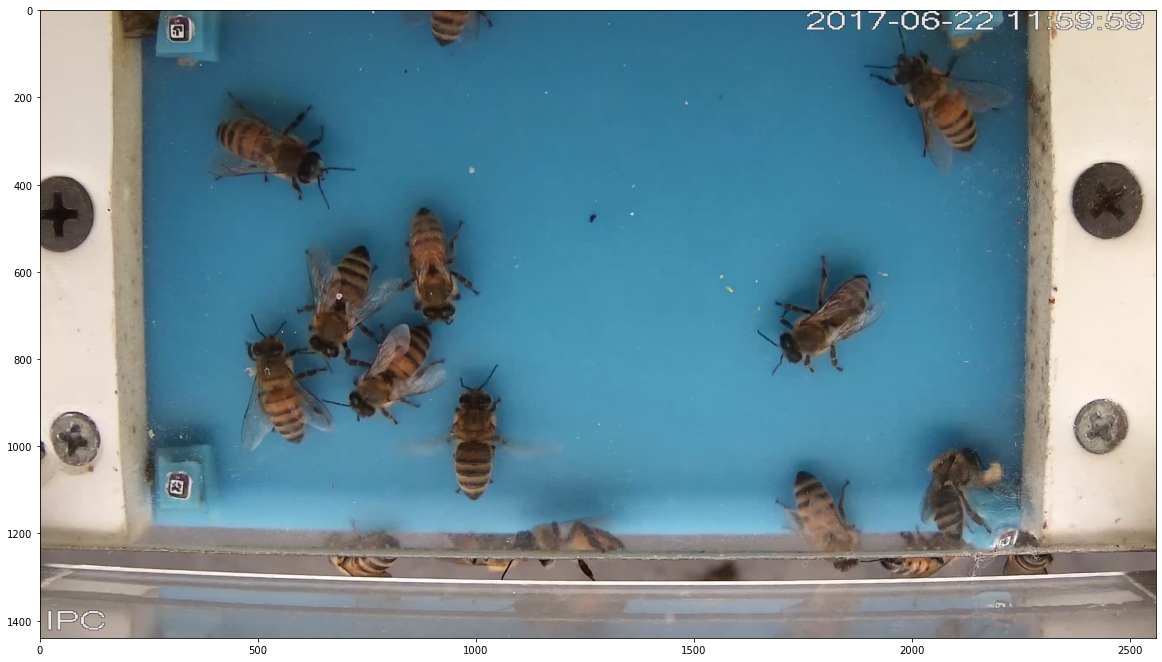

In [14]:
vplt.imshow(video[0])

### Plot a body

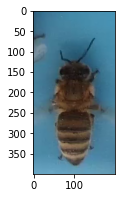

In [17]:
plt.figure(figsize=(4, 3))
vplt.imshow(video[0][0]);

### Plot Detections

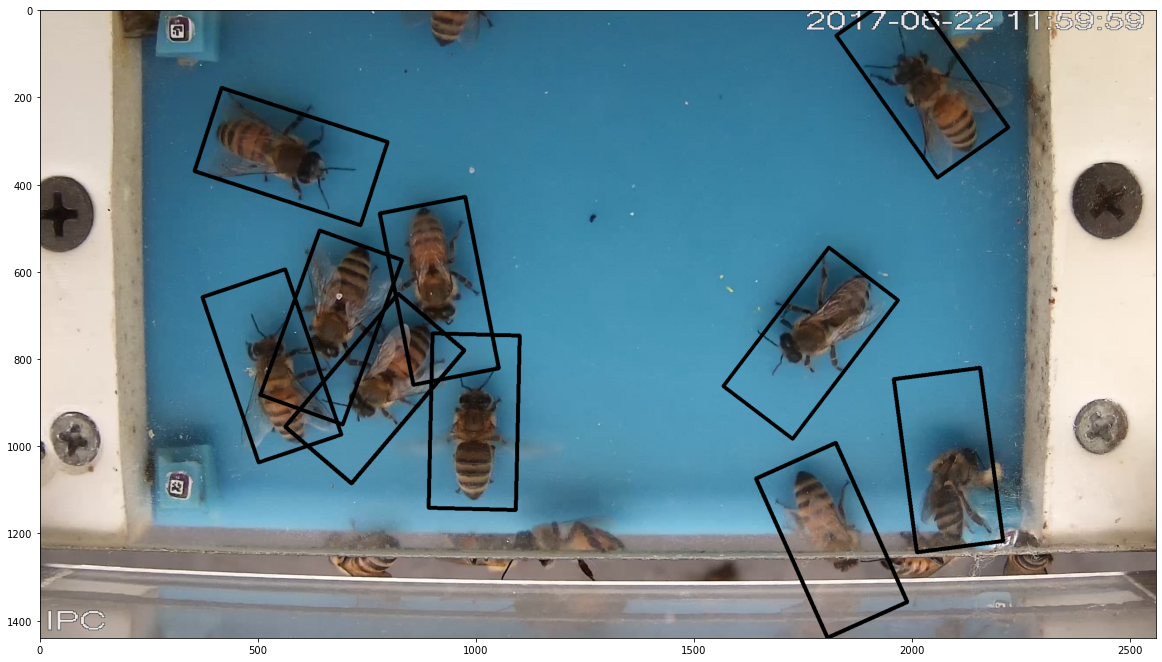

In [18]:
vplt.bbox(video[0]);

### Plot skeleton

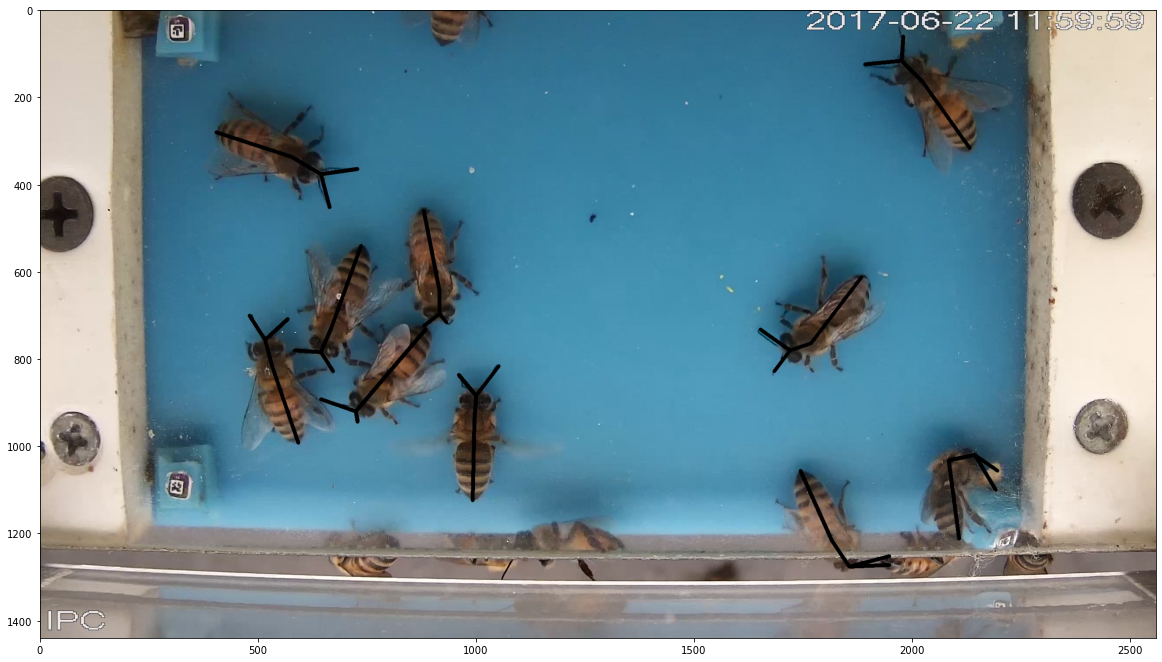

In [19]:
vplt.skeleton(video[0]);

### Tracking

Perform hugarian tracking.

In [22]:
video.hungarian_tracking()

Note that the bodies has id now.

In [24]:
video[0]

Frame: 0
Body(id=0, parts={1: [(992, 1124)], 2: [(1000, 884)], 3: [(996, 944)], 4: [(1052, 816)], 5: [(960, 836)])
Body(id=1, parts={1: [(1744, 1056)], 2: [(1856, 1276)], 3: [(1816, 1216)], 4: [(1948, 1272)], 5: [(1948, 1252)])
Body(id=2, parts={1: [(736, 540)], 2: [(644, 784)], 3: [(668, 728)], 4: [(584, 780)], 5: [(672, 828)])
Body(id=3, parts={1: [(404, 280)], 2: [(644, 376)], 3: [(576, 336)], 4: [(664, 452)], 5: [(728, 364)])
Body(id=4, parts={1: [(592, 992)], 2: [(516, 756)], 3: [(532, 816)], 4: [(568, 708)], 5: [(480, 700)])
Body(id=5, parts={1: [(884, 732)], 2: [(724, 920)], 3: [(768, 868)], 4: [(644, 892)], 5: [(728, 944)])
Body(id=6, parts={1: [(1884, 612)], 2: [(1720, 780)], 3: [(1768, 764)], 4: [(1652, 732)], 5: [(1684, 828)])
Body(id=7, parts={1: [(880, 460)], 2: [(916, 696)], 3: [(916, 644)], 4: [(880, 724)], 5: [(932, 716)])
Body(id=8, parts={1: [(2108, 1212)], 2: [(2144, 1020)], 3: [(2084, 1032)], 4: [(2192, 1100)], 5: [(2196, 1056)])
Body(id=9, parts={1: [(2132, 316)], 

Now the skletons has color by id.

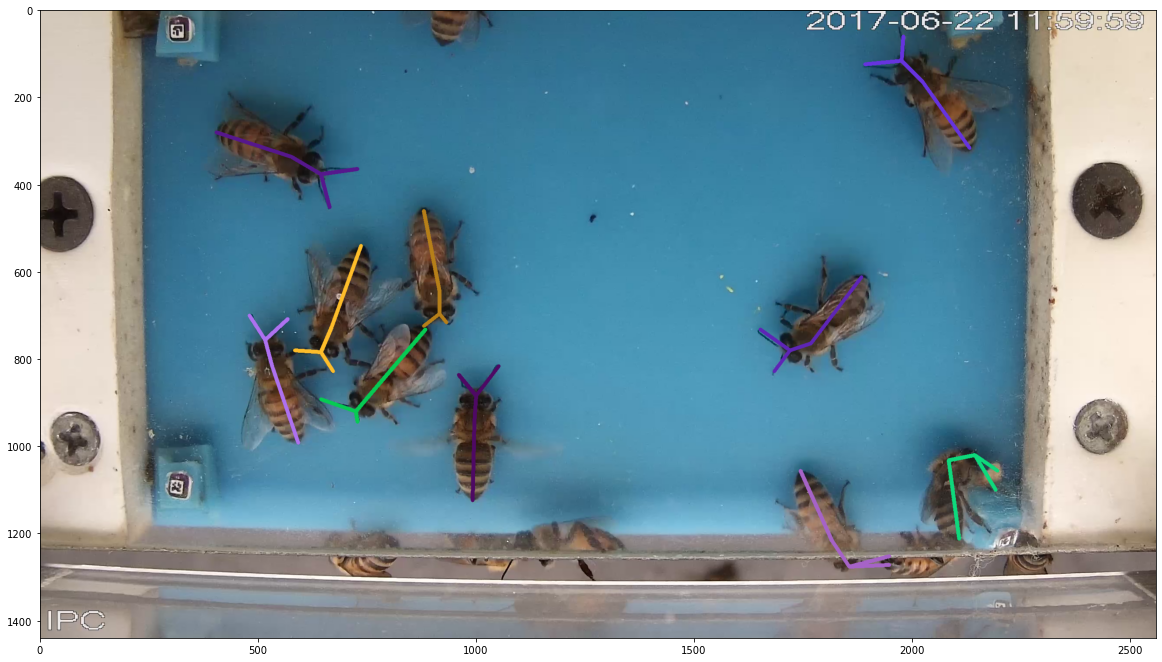

In [23]:
vplt.skeleton(video[0]);

### Plotting Tracks

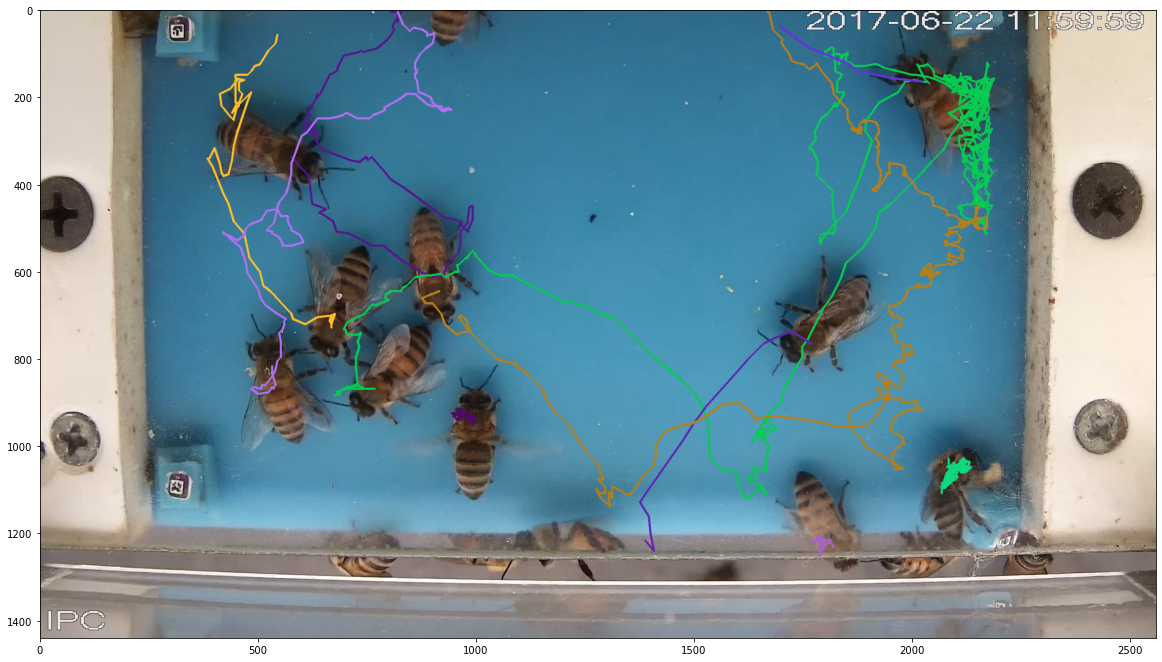

In [26]:
vplt.tracks(video[0]);

## Common Functions

In [27]:
print(video)

Video(name=C02_170622120000.mp4, detections=merged_C02_170622120000_detections.json, len=6000)


In [28]:
len(video) # return the amount of frames

6000

Access to tracks:

In [32]:
tracks = video.tracks
# tracks

Access to frames:

In [33]:
frames = video.frames

In [34]:
for frame in video:
    pass # iterate throught frames

In [35]:
n = 10
nth_frame = video[n]
print(nth_frame)

Frame: 10
Body(id=0, parts={1: [(996, 1124)], 2: [(992, 880)], 3: [(996, 940)], 4: [(1044, 804)], 5: [(936, 848)])
Body(id=5, parts={1: [(896, 856)], 2: [(664, 864)], 3: [(740, 868)], 4: [(660, 820)], 5: [(652, 892)])
Body(id=1, parts={1: [(1860, 1084)], 2: [(1724, 1280)], 3: [(1776, 1220)])
Body(id=2, parts={1: [(692, 680)], 2: [(472, 608)], 3: [(528, 644)], 4: [(476, 536)], 5: [(440, 632)])
Body(id=3, parts={1: [(608, 424)], 2: [(824, 576)], 3: [(760, 540)], 4: [(832, 612)], 5: [(892, 564)])
Body(id=4, parts={1: [(492, 1028)], 2: [(544, 800)], 3: [(508, 868)], 4: [(600, 804)], 5: [(544, 764)])
Body(id=8, parts={1: [(2052, 1204)], 2: [(2152, 1012)], 3: [(2084, 1060)], 4: [(2196, 1060)], 5: [(2180, 1020)])
Body(id=6, parts={1: [(1516, 928)], 2: [(1344, 1148)], 3: [(1392, 1104)], 4: [(1260, 1148)], 5: [(1340, 1204)])
Body(id=7, parts={1: [(836, 616)], 2: [(1028, 724)], 3: [(964, 704)], 5: [(1100, 684)])


### Slicing Video

In [36]:
short_video = video[:10]
double_speed_video = video[::2]

len(short_video), len(double_speed_video)

(10, 3000)

## Frame API

In [37]:
frame = video[2] # 0 - (len(video) - 1)
type(frame)

plotbee.frame.Frame

The frame object contains body objects 

In [38]:
len(frame) # return the amount of body detected in this frame

10

In [39]:
print(frame)

Frame: 2
Body(id=0, parts={1: [(996, 1124)], 2: [(1004, 876)], 3: [(992, 944)], 4: [(1072, 836)], 5: [(984, 844)])
Body(id=2, parts={1: [(680, 528)], 2: [(688, 760)], 3: [(676, 696)], 4: [(660, 788)], 5: [(708, 792)])
Body(id=1, parts={1: [(1764, 1044)], 2: [(1824, 1280)], 3: [(1804, 1216)], 4: [(1924, 1276)], 5: [(1944, 1248)])
Body(id=5, parts={1: [(876, 784)], 2: [(656, 880)], 3: [(712, 864)], 4: [(608, 860)], 5: [(632, 920)])
Body(id=9, parts={1: [(2040, 216)], 2: [(1816, 104)], 3: [(1876, 140)], 4: [(1800, 44)], 5: [(1732, 104)])
Body(id=6, parts={1: [(1836, 668)], 2: [(1620, 760)], 3: [(1684, 752)], 4: [(1540, 732)], 5: [(1580, 844)])
Body(id=3, parts={1: [(512, 296)], 2: [(664, 508)], 3: [(624, 444)], 4: [(648, 544)], 5: [(700, 528)])
Body(id=4, parts={1: [(572, 1012)], 2: [(528, 784)], 3: [(540, 860)], 4: [(560, 728)], 5: [(504, 780)])
Body(id=8, parts={1: [(2096, 1212)], 2: [(2152, 1012)], 3: [(2084, 1044)], 4: [(2196, 1076)], 5: [(2180, 1024)])
Body(id=7, parts={1: [(884, 484

In [40]:
body = frame[0] # Accesing to the body

In [41]:
for body in frame:
    print(body.info())

{'id': 0, 'frame': 2, 'angle': 1.2730300200567113, 'x': 992, 'y': 944, 'parts_num': 5}
{'id': 2, 'frame': 2, 'angle': 178.6360724683971, 'x': 676, 'y': 696, 'parts_num': 5}
{'id': 1, 'frame': 2, 'angle': 193.09189306434686, 'x': 1804, 'y': 1216, 'parts_num': 5}
{'id': 5, 'frame': 2, 'angle': 116.00334584451144, 'x': 712, 'y': 864, 'parts_num': 5}
{'id': 9, 'frame': 2, 'angle': 65.13630342824813, 'x': 1876, 'y': 140, 'parts_num': 5}
{'id': 6, 'frame': 2, 'angle': 118.92642583525362, 'x': 1684, 'y': 752, 'parts_num': 5}
{'id': 3, 'frame': 2, 'angle': 217.1168606832703, 'x': 624, 'y': 444, 'parts_num': 5}
{'id': 4, 'frame': 2, 'angle': 11.888658039627975, 'x': 540, 'y': 860, 'parts_num': 5}
{'id': 8, 'frame': 2, 'angle': 4.085616779974877, 'x': 2084, 'y': 1044, 'parts_num': 5}
{'id': 7, 'frame': 2, 'angle': 180.0, 'x': 884, 'y': 672, 'parts_num': 5}


## Get the image

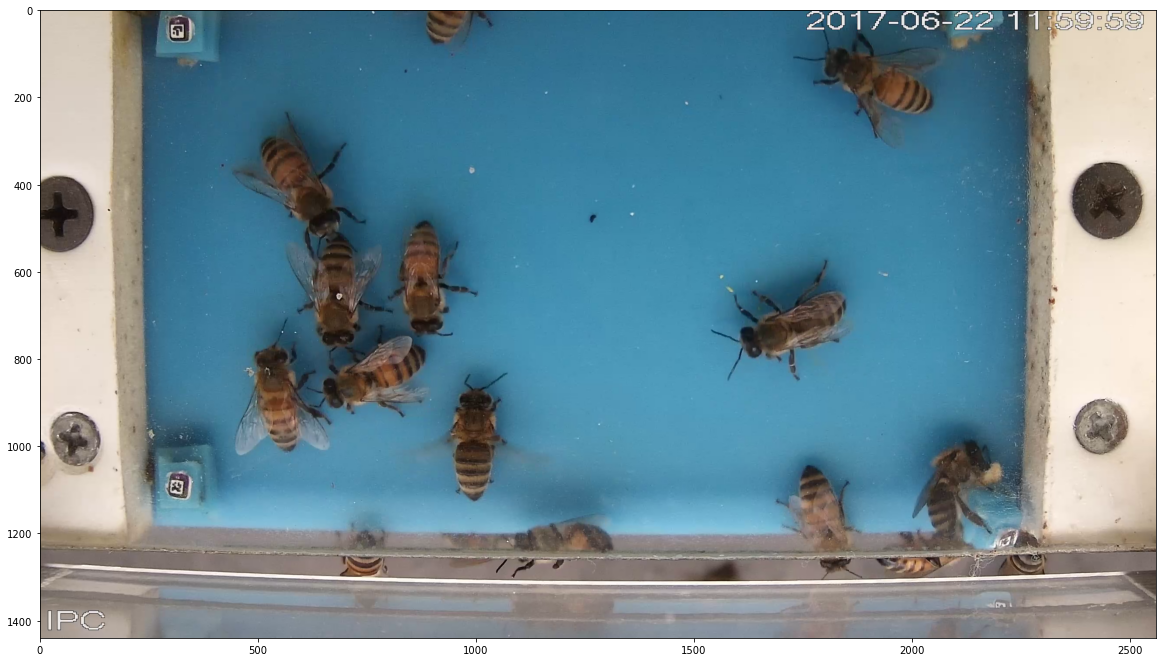

In [42]:
plt.imshow(frame.image); # .image method

## Save the frame

In [ ]:
# .save(folder, args) has the same args as .plot() and .image() plus the path to save.
# frame.save('frames/', args) # uncomment this to save the frame
frame.save('frames/', skeleton=True, bbox=True, min_parts=5, tracks=True)

## Body API

In [43]:
body = frame[0]
type(body)

plotbee.body.Body

In [44]:
print(body)

Body(id=0, parts={1: [(996, 1124)], 2: [(1004, 876)], 3: [(992, 944)], 4: [(1072, 836)], 5: [(984, 844)])


In [45]:
len(body) # return amount of detected parts of the body

5

In [46]:
print("Body id: {}, Frame id: {}".format(body.id, body.frameid))

Body id: 0, Frame id: 2


In [47]:
body.angle, body.center

(1.2730300200567113, (992, 944))

In [48]:
body.info()

{'id': 0,
 'frame': 2,
 'angle': 1.2730300200567113,
 'x': 992,
 'y': 944,
 'parts_num': 5}

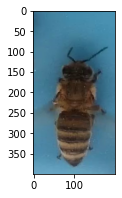

In [51]:
plt.figure(figsize=(4, 3))
vplt.imshow(body)

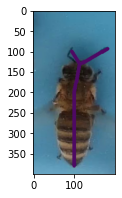

In [52]:
plt.figure(figsize=(4, 3))
vplt.skeleton(body)

## Exporting

In [ ]:
# this will call .save() to all the frame in the video.
video.export(os.path.join(OUTPUT_PATH, "video_images/"), skeleton=True, bbox=False, tracks=False, min_parts=5, max_workers=40)

To convert the folder to video used the follwing comand:

```
ffmpeg -r 60 -f image2 -s 1920x1080 -i video_images/%09d.jpg -vcodec libx264 -crf 25  -pix_fmt yuv420p video.mp4
```

In [ ]:
# this will call .save() to all the bodies in all frames in the video.
# plus save a dataset.csv which is .info() + path to the image for all the bodies.
video.export_bodies(os.path.join(OUTPUT_PATH, "extract_bodies_with_json2/"), max_workers=20)

In [ ]:
video.save("save.json") # this will save the skeleton.json